# Machine Learning

![ML](https://static1.squarespace.com/static/57812963f7e0aba104cde634/t/578133b0ff7c501754eca98b/1517447071341/?format=1500w)

There is a problem of classification where what I am looking for is to identifying whether the employee is living the company or not.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

### Load Data

In [2]:
df_cleaned=pd.read_csv('data/HR_data_cleaned.csv')

In [3]:
df_cleaned.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Data quality issues 

In [4]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 10 columns):
satisfaction_level       11991 non-null float64
last_evaluation          11991 non-null float64
number_project           11991 non-null int64
average_montly_hours     11991 non-null int64
time_spend_company       11991 non-null int64
work_accident            11991 non-null int64
left                     11991 non-null int64
promotion_last_5years    11991 non-null int64
department               11991 non-null object
salary                   11991 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 936.9+ KB


After a quick review of the dataset I realise some issues such that:

* To deal better with ML algorithms and statistics the features must have a NUMERICAL value. Therefore ,some **features (sales and salary)** will be transformed to numerical.


- **left** : as "target" column, it should occupy the last position in the dataframe. It will be moved to there.

**1. Convert to numerical** : "salary" and "sales"

In [5]:
df_cleaned['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [6]:
#Dummy Coding
hr_salary = pd.get_dummies(df_cleaned['salary'])
hr_salary.sample(10)

,high,low,medium
8570,0,0,1
2393,0,0,1
9238,0,1,0
887,0,0,1
3245,0,0,1
11967,0,0,1
5112,0,0,1
7312,0,1,0
500,1,0,0
4666,0,0,1


In [7]:
#join
hr2=pd.merge(df_cleaned,hr_salary,left_index=True, right_index=True)
hr2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0


In [8]:
#Now it is the turn of "department" 
hr2['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [9]:
hr_department = pd.get_dummies(df_cleaned['department'])
hr_department.sample(10)

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
991,0,0,0,0,0,0,0,0,1,0
90,0,0,0,0,0,0,0,1,0,0
7068,0,0,0,0,0,0,0,0,1,0
7031,0,0,0,0,0,0,0,1,0,0
4923,0,0,0,0,0,0,0,0,1,0
65,1,0,0,0,0,0,0,0,0,0
1856,0,0,0,1,0,0,0,0,0,0
3289,0,0,0,0,0,0,0,1,0,0
6052,0,0,0,1,0,0,0,0,0,0
8344,0,0,0,1,0,0,0,0,0,0


In [10]:
hr2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0


In [11]:
#join
hr3=pd.merge(hr2,hr_department,left_index=True, right_index=True)

In [12]:
#Now, I can remove "sales" and "salary" columns from DataFrame.Therefore it will include only numeric features
hr_numeric=hr3.drop(columns=['department','salary'])
hr_numeric.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,high,low,...,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


**2.Change the order of columns**: "left" column as "target" will be moved to the final of the data frame

In [13]:
cols = hr_numeric.columns.tolist()
cols

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'work_accident',
 'left',
 'promotion_last_5years',
 'high',
 'low',
 'medium',
 'IT',
 'RandD',
 'accounting',
 'hr',
 'management',
 'marketing',
 'product_mng',
 'sales',
 'support',
 'technical']

In [14]:
#Now "left" column will be the last one
cols_new = cols[:6]+cols[7:]+cols[6:7]
cols_new

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'work_accident',
 'promotion_last_5years',
 'high',
 'low',
 'medium',
 'IT',
 'RandD',
 'accounting',
 'hr',
 'management',
 'marketing',
 'product_mng',
 'sales',
 'support',
 'technical',
 'left']

In [15]:
#finally, it's included in the new dataframe called: hr_data
hr_data= hr_numeric[cols_new]
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,high,low,medium,...,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,left
0,0.38,0.53,2,157,3,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0.80,0.86,5,262,6,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,0.72,0.87,5,223,5,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0.37,0.52,2,159,3,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [16]:
#check values' type: 
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 21 columns):
satisfaction_level       11991 non-null float64
last_evaluation          11991 non-null float64
number_project           11991 non-null int64
average_montly_hours     11991 non-null int64
time_spend_company       11991 non-null int64
work_accident            11991 non-null int64
promotion_last_5years    11991 non-null int64
high                     11991 non-null uint8
low                      11991 non-null uint8
medium                   11991 non-null uint8
IT                       11991 non-null uint8
RandD                    11991 non-null uint8
accounting               11991 non-null uint8
hr                       11991 non-null uint8
management               11991 non-null uint8
marketing                11991 non-null uint8
product_mng              11991 non-null uint8
sales                    11991 non-null uint8
support                  11991 non-null uint8
technical    

At this point, our dataset is ready for being modeled.  Let's save and rename it!

### Saving cleaned dataset

In [17]:
hr_data.to_csv('data/HR_data_numeric.csv',index=False)

### Load Data

In [18]:
df_numeric=pd.read_csv('data/HR_data_numeric.csv')

### Brief analysis

In [19]:
df_numeric.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,high,low,medium,...,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,left
0,0.38,0.53,2,157,3,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0.80,0.86,5,262,6,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,0.72,0.87,5,223,5,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0.37,0.52,2,159,3,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [20]:
df_numeric.shape

(11991, 21)

In [21]:
df_numeric.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'high', 'low', 'medium', 'IT', 'RandD',
       'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales',
       'support', 'technical', 'left'],
      dtype='object')

### Definition of variables and split of the data

In [22]:
x=df_numeric[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'high', 'low', 'medium', 'IT', 'RandD',
       'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales',
       'support', 'technical']] #X will be the features
y=df_numeric['left'] #left column will be the target one (1=left, 0 =stay)

In [23]:
#Split the dataset into two parts: train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [24]:
#checking we have the desired 70% train, 30% split of the data
print("{0:0.2f}% in training set".format((len(x_train)/len(df_numeric.index)) * 100))
print("{0:0.2f}% in test set".format((len(x_test)/len(df_numeric.index)) * 100))

66.99% in training set
33.01% in test set


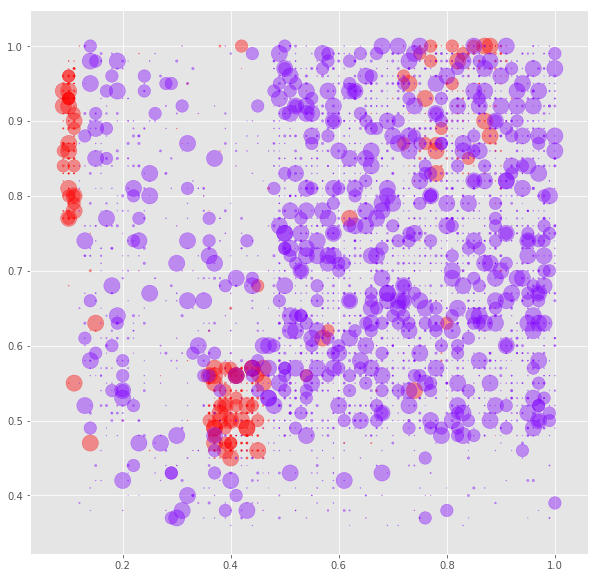

In [25]:
#Graph

X = df_numeric[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'high', 'low', 'medium', 'IT', 'RandD',
       'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales',
       'support', 'technical']].values
y = df_numeric['left']
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],X[:2],c=y,cmap="rainbow",alpha=0.4)
plt.show()

The graph shows in red the 3 clusters that I got in R exercise obtained using Elbow Method (see step 2.DataMining_R)

## Choosing the model


### Let's start with _Random Forest_ in order to determine which are the most important variables

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rclf=RandomForestClassifier(max_depth=20,oob_score=True)
rclf.fit(x,y)

/home/dsc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/dsc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [28]:
rclf.oob_score_

0.9773163205737636

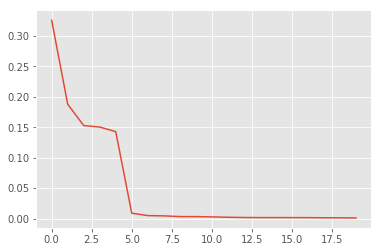

In [29]:
plt.plot(sorted(rclf.feature_importances_,reverse=True))
plt.show()

In sum, __satisfaction level (0.37)__ is the most important variable in the model followed by: 
* time spend at company: 0.19
* number projects: 0.16
* average_montly_hours: 0.14
* last evaluation: 0.11

Past the aforementioned columns, the model remains stable.

In [30]:
print (sorted(zip(map(lambda x: round(x, 4), rclf.feature_importances_), x_train), reverse=True))

[(0.3258, 'satisfaction_level'), (0.1879, 'number_project'), (0.1527, 'time_spend_company'), (0.1503, 'average_montly_hours'), (0.1428, 'last_evaluation'), (0.0088, 'work_accident'), (0.0048, 'low'), (0.0044, 'high'), (0.0032, 'technical'), (0.0032, 'sales'), (0.0027, 'medium'), (0.0021, 'support'), (0.0017, 'marketing'), (0.0016, 'hr'), (0.0016, 'accounting'), (0.0015, 'management'), (0.0015, 'IT'), (0.0013, 'RandD'), (0.0012, 'promotion_last_5years'), (0.001, 'product_mng')]


From now on, I will use only this 5 variables and drop the less important variables out of the model

In [31]:
x=df_numeric[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company']] 
y=df_numeric['left'] 

In [32]:
#Split the dataset into two parts: train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [33]:
#checking we have the desired 70% train, 30% split of the data
print("{0:0.2f}% in training set".format((len(x_train)/len(df_numeric.index)) * 100))
print("{0:0.2f}% in test set".format((len(x_test)/len(df_numeric.index)) * 100))

66.99% in training set
33.01% in test set


### Looking for the best accuracy, I will analyse some prediction models 

###  _K-nearest Neighbors_

In [34]:
from sklearn.neighbors import KNeighborsClassifier
clf1 = KNeighborsClassifier(n_neighbors=8)

In [35]:
clf1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,clf1.predict(x_test))

0.9552804446690247

In [37]:
from sklearn.model_selection import cross_val_score

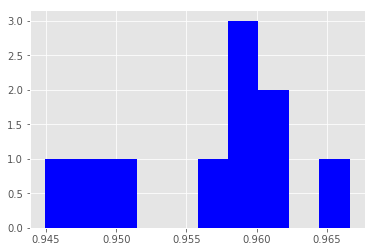

In [38]:
kn=cross_val_score(clf1,x,y,cv=10,scoring="accuracy")
plt.hist(kn, color='blue');

In [39]:
#Fitting the model
from sklearn.model_selection import GridSearchCV

In [40]:
clf1=GridSearchCV(estimator =KNeighborsClassifier(n_neighbors=5),
                  param_grid={"n_neighbors":np.arange(1,50)})

clf1.fit(x,y) #training the model with the best_params
clf1.best_params_

{'n_neighbors': 4}

In [41]:
accuracy_score(y_test,clf1.predict(x_test)) #now the accuracy is higher than before

0.9717028802425467

In [42]:
#now, with the entire dataset
cross_val_score(KNeighborsClassifier(n_neighbors=4),x,y).mean()

0.9588017031597258

## __Decision Tree__

In [135]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [149]:
# Create the estimator and train it
clf=DecisionTreeClassifier(max_depth=4)

In [150]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [151]:
# Predicting results for test dataset
y_pred = clf.predict(x_test)

In [152]:
#calculating some metrics
accuracy = metrics.accuracy_score(y_test, y_pred )  
confus_matrix = metrics.confusion_matrix(y_test, y_pred  )  
tree_classification_report = metrics.classification_report(y_test, y_pred  )  

print(accuracy)
print(confus_matrix)
print(tree_classification_report)

0.9686710459828196
[[3230   66]
 [  58  604]]
             precision    recall  f1-score   support

          0       0.98      0.98      0.98      3296
          1       0.90      0.91      0.91       662

avg / total       0.97      0.97      0.97      3958



In [153]:
from sklearn.model_selection import GridSearchCV

In [154]:
clf2= GridSearchCV(DecisionTreeClassifier(max_depth=3),
                  param_grid={"max_depth":np.arange(1,10)})
clf2.fit(x,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [155]:
clf2.best_params_

{'max_depth': 6}

In [156]:
clf=DecisionTreeClassifier(max_depth=3)
clf.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [157]:
from IPython.display import Image
from sklearn import tree
import pydotplus

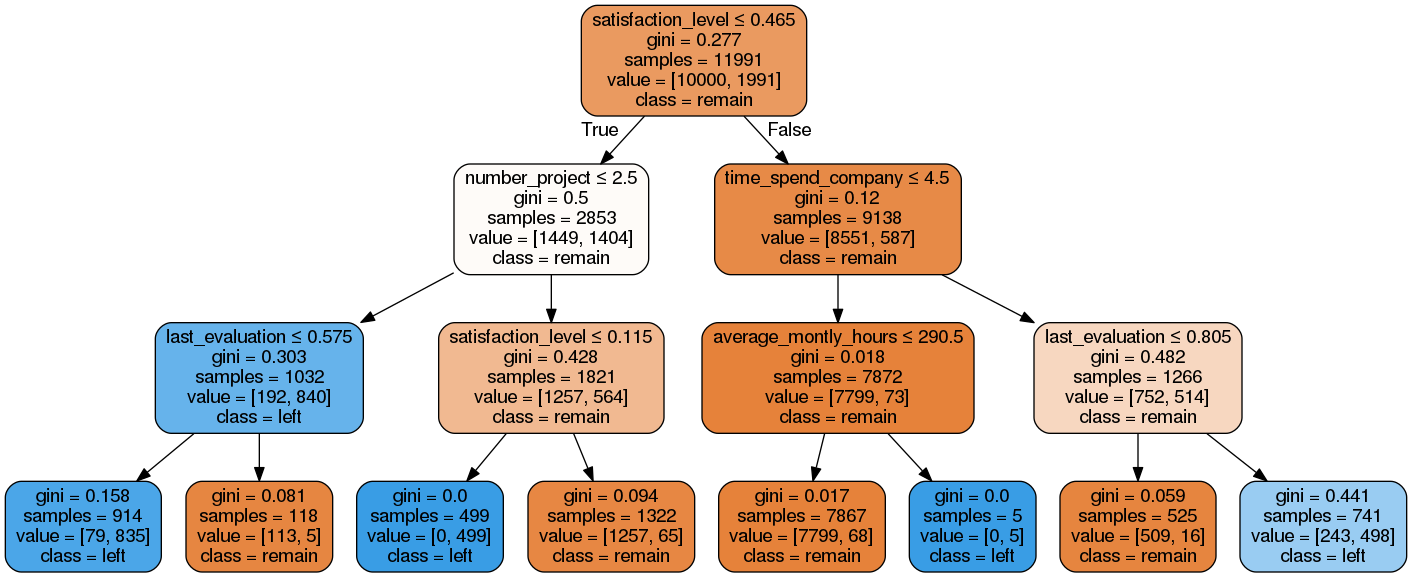

In [158]:
dot_data = tree.export_graphviz(clf, out_file=None,  
                     feature_names=x_test.columns.tolist(),
                     class_names=['remain', 'left'],
                     filled=True, rounded=True,  
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## __Support Vector Machines__ 

In [53]:
from sklearn.svm import SVC

In [54]:
clf3= GridSearchCV(SVC(kernel="poly"),
                  param_grid={"C":[10,100],"degree":np.arange(1)},
                  verbose=10)

In [56]:
clf3.fit(x,y)
clf3.best_score_

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=10, degree=0 ..................................................
[CV] ......... C=10, degree=0, score=0.8339169584792396, total=   0.6s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8338754065549162, total=   0.6s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340840840840841, total=   0.8s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.0s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8339169584792396, total=   0.6s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.9s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8338754065549162, total=   0.6s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.9s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340840840840841, total=   0.6s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.9s finished


0.8339588024351597

### In summary:

In [58]:
print(cross_val_score(clf1,x,y,cv=10,scoring='accuracy').mean())
print(cross_val_score(clf2,x,y,cv=10,scoring='accuracy').mean())
print(cross_val_score(clf3,x,y,cv=10,scoring='accuracy').mean())

0.9328659299416179
0.9818192938559912
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=10, degree=0 ..................................................
[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.6s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.6s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.6s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.6s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.6s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.4s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.5s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.2s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=10, degree=0 ..................................................
[CV] ......... C=10, degree=0, score=0.8337965536409117, total=   0.5s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.4s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8337965536409117, total=   0.7s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.3s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   1.0s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.0s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.8s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.4s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=10, degree=0 ..................................................
[CV] ......... C=10, degree=0, score=0.8337965536409117, total=   0.7s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.4s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.4s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8337965536409117, total=   0.4s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.1s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.9s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.5s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.6s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=10, degree=0 ..................................................
[CV] ......... C=10, degree=0, score=0.8337965536409117, total=   0.4s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.4s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.2s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8337965536409117, total=   0.5s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.0s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.8s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.8s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.9s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=10, degree=0 ..................................................
[CV] ......... C=10, degree=0, score=0.8337965536409117, total=   0.6s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.4s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8337965536409117, total=   0.5s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.3s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.6s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.1s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.5s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.0s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=10, degree=0 ..................................................
[CV] ......... C=10, degree=0, score=0.8337965536409117, total=   0.4s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.2s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8337965536409117, total=   0.4s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.0s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.6s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.0s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.5s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.8s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=10, degree=0 ..................................................
[CV] ......... C=10, degree=0, score=0.8337965536409117, total=   0.5s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.4s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.3s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8337965536409117, total=   0.4s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.1s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.7s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.0s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.8s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.1s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=10, degree=0 ..................................................
[CV] ......... C=10, degree=0, score=0.8337965536409117, total=   0.5s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.7s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.6s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.7s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8337965536409117, total=   0.5s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.5s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.6s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.3s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.5s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.1s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=10, degree=0 ..................................................
[CV] ......... C=10, degree=0, score=0.8337965536409117, total=   0.5s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.6s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8337965536409117, total=   0.5s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.4s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.1s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.5s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.9s finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=10, degree=0 ..................................................
[CV] ......... C=10, degree=0, score=0.8337965536409117, total=   0.6s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=10, degree=0 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV] ......... C=10, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.6s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8337965536409117, total=   0.8s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.7s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.5s
[CV] C=100, degree=0 .................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.5s remaining:    0.0s


[CV] ........ C=100, degree=0, score=0.8340283569641368, total=   0.5s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.3s finished


0.8339588546010563


## Bagging

According to Wikipedia, [Bootstrap aggregating](https://en.wikipedia.org/wiki/Bootstrap_aggregating), also called __bagging__, is a machine learning ensemble meta-algorithm designed to __improve the stability and accuracy of machine learning algorithms__ used in statistical classification and regression. It also __reduces variance and helps to avoid overfitting__. 

Although it is usually applied to decision tree methods, it can be used with any type of method. Bagging is a special case of the model averaging approach. 